In [1]:
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
#通过pandas的sample函数实现下采样
def lower_sample_data_by_sample(df,percent=1):
    most_data = df[df['late_days'] == 0]  # 多数类别的样本
    minority_data = df[df['late_days'] == 1]  # 少数类别的样本   
    #随机采样most_data中的数据
    lower_data=most_data.sample(n=int(percent*len(minority_data)),replace=False,random_state=0,axis=0)   
    return (pd.concat([lower_data,minority_data]))

In [125]:
df_1=pd.read_csv('aku_synchronous_credit_first_cash_loan_more_feature_gp.csv').round(4)
df_2=pd.read_csv('not_aku_synchronous_credit_first_cash_loan_more_feature_gp.csv').round(4)

In [126]:
df_1=df_1[['uid','phone_num', 'features_incr_record_days',
       'features_incr_total_page_op_page_rate', 'features_incr_total_action',
       'features_incr_total_session', 'features_incr_total_action_rate',
       'features_incr_total_page_action_rate', 'features_incr_avg_w9',
       'features_incr_total_w2_15d', 'features_incr_total_w2_3d',
       'features_incr_total_w2_7d_div_15d',
       'ual_dws_total_record', 'device_id_if_change', 'is_rooted',
       'sim_imsi_uid_num', 'longitude_sub', 'latitude_sub',
       'hardware_total_record','user_education', 'user_own_house',
       'user_relation', 'user_working_time_level', 'user_month_income_level',
       'login_dev_cnt_15d', 'login_dev_cnt_30d', 'login_dev_cnt_90d',
       'login_before_login_cnt', 'login_login_cnt_60d', 'login_login_cnt_90d',
       'app_install_num_30d', 
       'app_install_Food_App_num_30d',
       'app_install_Health_App_num_30d',
       'app_install_Sports_App_num_30d',
       'app_install_Educational_App_num_30d',
       'app_install_Travel_App_num_30d', 'app_install_Books_App_num_30d',
       'app_install_News_App_num_30d', 'app_install_Video_App_num_30d',
       'app_install_Social_App_num_30d',
       'app_install_Casino_App_ratio_30d',
       'app_install_Card_App_ratio_30d', 'app_install_Food_App_ratio_30d',
       'app_install_Health_App_ratio_30d',
       'app_install_Sports_App_ratio_30d',
       'app_install_Educational_App_ratio_30d',
       'app_install_Travel_App_ratio_30d',
       'app_install_Books_App_ratio_30d',
       'app_install_News_App_ratio_30d',
       'app_install_Video_App_ratio_30d',
       'app_install_Social_App_ratio_30d', 'app_install_ty_num_30d', 'app_install_l1_num_30d',
       'app_install_l2_num_30d', 'app_install_l3_num_30d',
       'app_install_l4_num_30d', 'app_install_l5_num_30d',
       'late_days', 'year', 'month','day']]
df_1.loc[df_1.late_days<=15,'late_days'] = 0
df_1.loc[df_1.late_days>15,'late_days'] = 1
df_1.shape

(67793, 61)

In [127]:
df_2=df_2[['uid','phone_num', 'features_incr_record_days',
       'features_incr_total_page_op_page_rate', 'features_incr_total_action',
       'features_incr_total_session', 'features_incr_total_action_rate',
       'features_incr_total_page_action_rate', 'features_incr_avg_w9',
       'features_incr_total_w2_15d', 'features_incr_total_w2_3d',
       'features_incr_total_w2_7d_div_15d',
       'ual_dws_total_record', 'device_id_if_change', 'is_rooted',
       'sim_imsi_uid_num', 'longitude_sub', 'latitude_sub',
       'hardware_total_record','user_education', 'user_own_house',
       'user_relation', 'user_working_time_level', 'user_month_income_level',
       'login_dev_cnt_15d', 'login_dev_cnt_30d', 'login_dev_cnt_90d',
       'login_before_login_cnt', 'login_login_cnt_60d', 'login_login_cnt_90d',
       'app_install_num_30d', 
       'app_install_Food_App_num_30d',
       'app_install_Health_App_num_30d',
       'app_install_Sports_App_num_30d',
       'app_install_Educational_App_num_30d',
       'app_install_Travel_App_num_30d', 'app_install_Books_App_num_30d',
       'app_install_News_App_num_30d', 'app_install_Video_App_num_30d',
       'app_install_Social_App_num_30d',
       'app_install_Casino_App_ratio_30d',
       'app_install_Card_App_ratio_30d', 'app_install_Food_App_ratio_30d',
       'app_install_Health_App_ratio_30d',
       'app_install_Sports_App_ratio_30d',
       'app_install_Educational_App_ratio_30d',
       'app_install_Travel_App_ratio_30d',
       'app_install_Books_App_ratio_30d',
       'app_install_News_App_ratio_30d',
       'app_install_Video_App_ratio_30d',
       'app_install_Social_App_ratio_30d', 'app_install_ty_num_30d', 'app_install_l1_num_30d',
       'app_install_l2_num_30d', 'app_install_l3_num_30d',
       'app_install_l4_num_30d', 'app_install_l5_num_30d',
       'late_days', 'year', 'month','day']]
df_2.loc[df_2.late_days<=15,'late_days'] = 0
df_2.loc[df_2.late_days>15,'late_days'] = 1
df_2.shape

(1144594, 61)

In [128]:
train_data_1=df_1.loc[ ((df_2.year==2019)&(df_2.month.isin([11,12])))|((df_1.year==2020)&(df_1.month.isin([1])))| ((df_1.year==2020)&(df_1.month.isin([2]))&(df_1.day.isin([i for i in range(1,1)])))]
train_data_2=df_2.loc[ ((df_2.year==2019)&(df_2.month.isin([11,12])))|((df_2.year==2020)&(df_2.month.isin([1])))]
train_data = pd.concat([train_data_1,train_data_2])
#train_data=lower_sample_data_by_sample(train_data)
test_data=df_1.loc[(df_1.year==2020)&(df_1.month==2)&(df_1.day.isin([i for i in range(1,15)]))]
train_Y=train_data['late_days']
test_Y=test_data['late_days']
train_X=train_data.drop(['uid','late_days','month','year','day'],axis=1)
test_X=test_data.drop(['uid','late_days','month','year','day'],axis=1)
print(train_data.shape,test_data.shape,test_data.loc[test_data.late_days==0].shape,test_data.loc[test_data.late_days==1].shape)

(361255, 61) (11758, 61) (9589, 61) (2169, 61)


In [129]:
#train_data.loc[(train_data.late_days==1)&(train_data.uid.isin(train_data_1.uid.values))].shape

In [130]:
#train_data.loc[train_data.uid.isin(train_data_1.uid.values)].shape

In [131]:
from xgboost import XGBClassifier
#clf = XGBClassifier(learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, subsample=0.8,random_state=0)
clf = XGBClassifier(learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=4500, subsample=0.8,random_state=0,scale_pos_weight=5)
clf.fit(train_X,train_Y)
print(clf.score(train_X,train_Y))
print(clf.score(test_X,test_Y))
predict_Y=clf.predict(test_X)
print("recall_score:",recall_score(test_Y,predict_Y))
print("precision_score:",precision_score(test_Y,predict_Y))
print("f1_score:",f1_score(test_Y,predict_Y))
score_Y=clf.predict_proba(test_X)[:,1]
fpr,tpr,_=roc_curve(test_Y.ravel(),score_Y)
print("ks:",max(tpr-fpr)) #ks
print("auc:",roc_auc_score(test_Y,score_Y))
print("label=0 recall_score:",sum((test_Y==0)&(predict_Y==0))/ test_data.loc[test_data.late_days==0].shape[0]) #recall_score
print("label=0 precision_score:",sum((test_Y==0)&(predict_Y==0))/ sum(predict_Y==0)) #precision_score

0.5647340521238461
0.5811362476611669
recall_score: 0.6532964499769479
precision_score: 0.2534883720930233
f1_score: 0.365253254285346
ks: 0.22196403103467688
auc: 0.6489855225902624
label=0 recall_score: 0.5648138492022109
label=0 precision_score: 0.8780804150453956


In [132]:
test_data=df_1.loc[(df_1.year==2020)&(df_1.month==2)&(df_1.day.isin([i for i in range(15,30)]))]
test_Y=test_data['late_days']
test_X=test_data.drop(['uid','late_days','month','year','day'],axis=1)
print(clf.score(test_X,test_Y))
print(test_data.shape,test_data.loc[test_data.late_days==0].shape,test_data.loc[test_data.late_days==1].shape)
score_Y=clf.predict_proba(test_X)[:,1]
fpr,tpr,_=roc_curve(test_Y.ravel(),score_Y)
print("ks:",max(tpr-fpr)) #ks
print("auc:",roc_auc_score(test_Y,score_Y))

0.5860849056603774
(7632, 61) (6210, 61) (1422, 61)
ks: 0.21638843025744509
auc: 0.6387506766229323


In [133]:
score_Y=clf.predict_proba(train_X)[:,1]
fpr,tpr,_=roc_curve(train_Y.ravel(),score_Y)
print("ks:",max(tpr-fpr)) #ks
print("auc:",roc_auc_score(train_Y,score_Y))

ks: 0.260857071415595
auc: 0.6949272562624359


In [134]:
test_data=df_1.loc[(df_1.year==2020)&(df_1.month==2)&(df_1.day.isin([i for i in range(1,30)]))]
test_data = pd.concat([train_data,test_data])
test_Y=test_data['late_days']
test_X=test_data.drop(['uid','late_days','month','year','day'],axis=1)
print(test_data.shape,test_data.loc[test_data.late_days==0].shape,test_data.loc[test_data.late_days==1].shape)
score_Y=clf.predict_proba(test_X)[:,1]
fpr,tpr,_=roc_curve(test_Y.ravel(),score_Y)
print("ks:",max(tpr-fpr)) #ks
print("auc:",roc_auc_score(test_Y,score_Y))

(380645, 61) (319599, 61) (61046, 61)
ks: 0.2577516648798568
auc: 0.6918213749154781


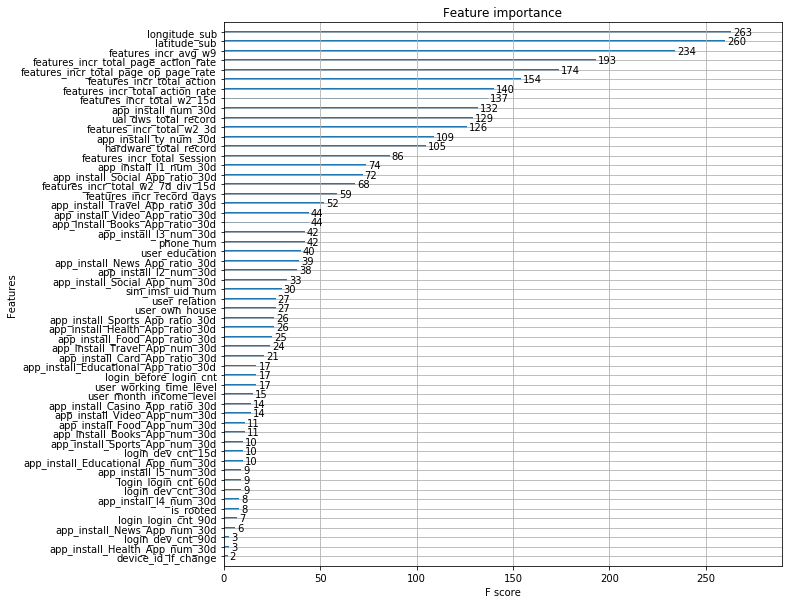

In [14]:
import xgboost as xgb
fig, ax = plt.subplots(1,1,figsize=(10,10))
xgb.plot_importance(clf.get_booster(), max_num_features=100, ax=ax)

In [15]:
feature_importances = clf.feature_importances_
feature_importances

array([0.13046338, 0.01068949, 0.0141931 , 0.01232977, 0.00978923,
       0.01027628, 0.01074249, 0.01362864, 0.01178573, 0.01089009,
       0.01419147, 0.05349817, 0.0074812 , 0.01007002, 0.02643412,
       0.02052864, 0.01826362, 0.0124452 , 0.0649456 , 0.0484813 ,
       0.02925648, 0.01295127, 0.01022194, 0.01279891, 0.01168713,
       0.00485954, 0.01113746, 0.00883645, 0.00804184, 0.0192909 ,
       0.        , 0.01334162, 0.        , 0.        , 0.04312293,
       0.00868799, 0.00947576, 0.01608926, 0.00793066, 0.00793564,
       0.00818836, 0.00861026, 0.01047966, 0.01185386, 0.01086481,
       0.01514868, 0.00952762, 0.00824822, 0.01088404, 0.01122552,
       0.01002449, 0.01075633, 0.02398562, 0.02278672, 0.        ,
       0.01897847, 0.01266834, 0.0370352 , 0.00582737, 0.00611322,
       0.        ], dtype=float32)

In [16]:
feature_index = np.where(feature_importances<0.001)[0]
train_X.columns[feature_index]

Index(['app_install_ever_install_app_30d', 'app_install_Card_App_num_30d',
       'app_install_Casino_App_num_30d', 'app_install_ever_install_ty_app_30d',
       'app_install_l6_num_30d'],
      dtype='object')

In [ ]:
score_Y=clf.predict_proba(test_X)[:,1]
fpr,tpr,_=roc_curve(test_Y.ravel(),score_Y)
print("ks:",max(tpr-fpr)) #ks
print("auc:",roc_auc_score(test_Y,score_Y))

In [ ]:
plot_bin_psi(clf.predict_proba(train_X)[:,1],clf.predict_proba(test_X)[:,1],step=0.1)

In [ ]:
test_predicted = test_data[['uid']]
test_predicted.loc[:,'label'] = test_data.late_days
test_predicted.loc[:,'pred_prob'] = np.round(score_Y,4)

In [ ]:
plotbar(test_predicted)

In [ ]:
ks(data=test_predicted,target='label', prob='pred_prob',n=10)[0]

In [ ]:
ks(data=test_predicted,target='label', prob='pred_prob',n=10)[1]

In [ ]:
#############################################################################    CAL KS,LIFT
import matplotlib.pyplot as plt
def ks(data=None,target=None, prob=None, n=10):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], n)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    ## 每一箱的概率区间
    kstable['min_prob'] = np.round(grouped.min()[prob],4)
    kstable['max_prob'] = np.round(grouped.max()[prob],4)
    ## 每一箱的 坏样本数，好样本数，样本数
    kstable['bad_cnt']   = grouped.sum()[target]
    kstable['good_cnt'] = grouped.sum()['target0']
    kstable['sample_cnt']=kstable['bad_cnt'] + kstable['good_cnt']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)    
    ## 每一箱的坏样本占所有坏样本的比例，每一箱的好样本占所有好样本的比例
    kstable['actual_bad_ratio'] = (kstable.bad_cnt / data[target].sum()).apply('{0:.2%}'.format)
    kstable['actual_good_ratio'] = (kstable.good_cnt / data['target0'].sum()).apply('{0:.2%}'.format)    
    ## 每一箱的累积好坏样本
    kstable['cum_bad_cnt']=kstable.bad_cnt.cumsum()
    kstable['cum_good_cnt']=kstable.good_cnt.cumsum()
    kstable['cum_sample_cnt']=kstable.sample_cnt.cumsum()    
    ## 每一箱的坏样本占所有坏样本的比例的累积，每一箱的好样本占所有好样本的比例的累积,  每一箱的样本占所有样本的比例的累积
    kstable['cum_bad_ratio']=np.round((kstable.bad_cnt / data[target].sum()).cumsum(),4)
    kstable['cum_good_ratio']=np.round((kstable.good_cnt / data['target0'].sum()).cumsum(),4)
    kstable['cum_total_ratio'] = np.round((kstable.sample_cnt / data[target].shape[0]).cumsum(),4)
    kstable['KS'] = np.round(kstable['cum_bad_ratio']-kstable['cum_good_ratio'], 4)
    
    ratio_ones = kstable['bad_cnt'].sum() / kstable['sample_cnt'].sum()    #原始坏样本的比例
    kstable['LIFT'] = np.round(kstable['cum_bad_cnt']/kstable['cum_sample_cnt']/ratio_ones,3) 
    #Formating
#     kstable['cum_bad_ratio']= kstable['cum_bad_ratio'].apply('{0:.2%}'.format)
#     kstable['cum_good_ratio']= kstable['cum_good_ratio'].apply('{0:.2%}'.format)      
    kstable['pred_interval']='(' + kstable['min_prob'].map(lambda x:'%.4f' % x) + ',' + kstable['max_prob'].map(lambda x:'%.4f' % x) +']' 
    
    #Display KS
    print("KS is " + str(max(kstable['KS'])))
    return(kstable[['pred_interval','sample_cnt','bad_cnt','actual_bad_ratio','cum_bad_cnt','cum_bad_ratio','KS']],
          kstable[['pred_interval','cum_bad_ratio','cum_total_ratio','LIFT']])

#############################################################################    PLOT KS
import matplotlib.pyplot as plt
def PlotKS(preds, labels, n, asc):    # preds is score: asc=1    # preds is prob: asc=0
    pred = preds  # 预测值
    bad = labels  # 取1为bad, 0为good
    ksds = pd.DataFrame({'bad': bad, 'pred': pred})
    ksds['good'] = 1 - ksds.bad
    
    if asc == 1:ksds1 = ksds.sort_values(by=['pred', 'bad'], ascending=[True, True])
    elif asc == 0:ksds1 = ksds.sort_values(by=['pred', 'bad'], ascending=[False, True])
    ksds1.index = range(len(ksds1.pred))
    ksds1['cumsum_good1'] = 1.0*ksds1.good.cumsum()/sum(ksds1.good)
    ksds1['cumsum_bad1'] = 1.0*ksds1.bad.cumsum()/sum(ksds1.bad)
    
    if asc == 1:ksds2 = ksds.sort_values(by=['pred', 'bad'], ascending=[True, False])
    elif asc == 0:ksds2 = ksds.sort_values(by=['pred', 'bad'], ascending=[False, False])
    ksds2.index = range(len(ksds2.pred))
    ksds2['cumsum_good2'] = 1.0*ksds2.good.cumsum()/sum(ksds2.good)
    ksds2['cumsum_bad2'] = 1.0*ksds2.bad.cumsum()/sum(ksds2.bad)
    
    # ksds1 ksds2 -> average
    ksds = ksds1[['cumsum_good1', 'cumsum_bad1']]
    ksds['cumsum_good2'] = ksds2['cumsum_good2']
    ksds['cumsum_bad2'] = ksds2['cumsum_bad2']
    ksds['cumsum_good'] = (ksds['cumsum_good1'] + ksds['cumsum_good2'])/2
    ksds['cumsum_bad'] = (ksds['cumsum_bad1'] + ksds['cumsum_bad2'])/2
    
    # ks
    ksds['ks'] = ksds['cumsum_bad'] - ksds['cumsum_good']
    ksds['tile0'] = range(1, len(ksds.ks) + 1)
    ksds['tile'] = 1.0*ksds['tile0']/len(ksds['tile0'])
    
    qe = list(np.arange(0, 1, 1.0/n))
    qe.append(1)
    qe = qe[1:]
    
    ks_index = pd.Series(ksds.index)
    ks_index = ks_index.quantile(q = qe)
    ks_index = np.ceil(ks_index).astype(int)
    ks_index = list(ks_index)
    
    ksds = ksds.loc[ks_index]
    ksds = ksds[['tile', 'cumsum_good', 'cumsum_bad', 'ks']]
    ksds0 = np.array([[0, 0, 0, 0]])
    ksds = np.concatenate([ksds0, ksds], axis=0)
    ksds = pd.DataFrame(ksds, columns=['tile', 'cumsum_good', 'cumsum_bad', 'ks'])
    
    ks_value = ksds.ks.max()
    ks_pop = ksds.tile[ksds.ks.idxmax()]
    print ('ks_value is ' + str(np.round(ks_value, 4)) + ' at pop = ' + str(np.round(ks_pop, 4)))
    
    # chart
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    plt.plot(ksds.tile, ksds.cumsum_good, label='cum_good',color='blue', linestyle='-', linewidth=2)
    plt.plot(ksds.tile, ksds.cumsum_bad, label='cum_bad',color='red', linestyle='-', linewidth=2)                        
    plt.plot(ksds.tile, ksds.ks, label='ks',color='green', linestyle='-', linewidth=2)                       
    plt.axvline(ks_pop, color='gray', linestyle='--')
    plt.axhline(ks_value, color='green', linestyle='--')
    plt.axhline(ksds.loc[ksds.ks.idxmax(), 'cumsum_good'], color='blue', linestyle='--')
    plt.axhline(ksds.loc[ksds.ks.idxmax(),'cumsum_bad'], color='red', linestyle='--')
    plt.title('KS=%s ' %np.round(ks_value, 4) + 'at Pop=%s' %np.round(ks_pop, 4), fontsize=15)
    return ksds

def cal_psi(actual, predict, bins=10):
    actual_min = actual.min()   
    actual_max = actual.max()   
    binlen = (actual_max - actual_min) / bins    
    cuts = [actual_min + i * binlen for i in range(1, bins)] 
    cuts.insert(0, -float("inf"))
    cuts.append(float("inf"))
    actual_cuts = np.histogram(actual, bins=cuts) 
    predict_cuts = np.histogram(predict, bins=cuts)  
    actual_df = pd.DataFrame(actual_cuts[0],columns=['actual'])
    predict_df = pd.DataFrame(predict_cuts[0], columns=['predict'])
    psi_df = pd.merge(actual_df,predict_df,right_index=True,left_index=True)   
    psi_df['actual_rate'] = (psi_df['actual'] + 1) / psi_df['actual'].sum() 
    psi_df['predict_rate'] = (psi_df['predict'] + 1) / psi_df['predict'].sum()
    psi_df['psi'] = (psi_df['actual_rate'] - psi_df['predict_rate']) * np.log(
        psi_df['actual_rate'] / psi_df['predict_rate'])
    psi = psi_df['psi'].sum()
    return psi, psi_df

def plotbar(data=None,target='label', prob='pred_prob', index=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]):
    d1 = pd.DataFrame({'x':data[prob],'y':data[target],'bucket':pd.cut(data[prob], index)})
    d2 = d1.groupby('bucket',as_index=True)  # 按照分箱结果进行分组聚合
    d3 = pd.DataFrame(d2.x.min(),columns=['min_bin']) 
    d3['min_bin'] = d2.x.min()  # 箱体的左边界
    d3['max_bin'] = d2.x.max()  # 箱体的右边界
    d3['bad'] = d2.y.sum()  # 每个箱体中坏样本的数量
    d3['good'] = d2.y.count() - d2.y.sum() # 每个箱体中好样本的数量
    d3['total'] = d2.y.count() # 每个箱体的总样本数
    d3.index = index[1:]
    d3[['bad','good']].plot.bar(stacked=True,color=['darkorange','royalblue'],position=1,width=1,legend=False,figsize=(8,5))
    
##    CAL each bin's psi
import matplotlib
def plot_bin_psi(train_pred,test_pred,step=0.01):
    t1 = pd.DataFrame()
    t1['predicted'] = train_pred
    t1.sort_values('predicted',ascending=False,inplace=True)  ## 按预测概率排序
    t2 = pd.DataFrame()
    t2['predicted'] = test_pred
    t2.sort_values('predicted',ascending=False,inplace=True)  ## 按预测概率排序    
    x_val = np.arange(step,1+step,step)
    psi=[]
    train_ratio=[]
    test_ratio=[]
    last_end_1=0
    last_end_2=0
    for x in x_val:
        num_data_1 = int(np.ceil(x*len(t1))) 
        data_here_1 = t1.iloc[last_end_1:num_data_1,:] 
        train_ratio.append(data_here_1.shape[0]/len(train_pred))
        num_data_2 = int(np.ceil(x*len(t2))) 
        data_here_2 = t2.iloc[last_end_2:num_data_2,:]
        test_ratio.append(data_here_2.shape[0]/len(test_pred))
        psi.append(np.round(cal_psi(data_here_1['predicted'].astype(np.float),data_here_2['predicted'].astype(np.float),bins=10)[0],3))
        last_end_1=num_data_1
        last_end_2=num_data_2
        
    cal_lift = pd.DataFrame(list(zip(train_ratio,test_ratio,psi)),columns=['train样本量占比','test样本量占比','每一箱的psi'])
    print(cal_lift)

In [ ]:
# PlotKS(test_predicted['pred_prob'], test_predicted['label'], n=10000, asc=0)   #  画KS图
# ks(data=test_predicted,target='label', prob='pred_prob',n=10)[0]   #KS表格，直接填
# ks(data=test_predicted,target='label', prob='pred_prob',n=10)[1]   #lift表格，拿来画图